In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random

# Creatring a dataset with make_classification
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

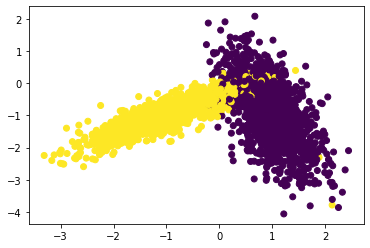

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [ ]:
X_train.shape

(7500, 2)

In [ ]:
y_train.shape

(7500,)

In [ ]:
X_train

array([[ 0.45267141, -1.42381257],
       [ 0.61696406, -0.00418956],
       [-0.60025705, -0.72979921],
       ...,
       [ 0.63107723, -0.4743162 ],
       [-2.09387761, -1.76791586],
       [ 1.07909424, -1.67541279]])

In [ ]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter.
</pre>

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model

    random_values_for_param_range = sorted(random.sample(range(1,param_range),10))
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    
    train_scores = []
    test_scores = []
    
    params = {'n_neighbors' : random_values_for_param_range }
    # it will take classifier and set of values for hyper prameter in dict type
    # dict({hyper_parmeter: [list_of_values]})
    # as we are implementing this only for KNN, the hyper parameter should be n_neighbors
    # And we will return it from the function at the end so that we can use this same params
    # while plotting the graph as well.
    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  =[]
        
        for j in range(0,folds):
            
            #2.devide numbers ranging from  0 to len(X_train) into groups= folds
            # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
            # group 1: 0-33, group 2:34-66, group 3: 67-100
            
            no_of_elements_in_each_fold = int(len(x_train)/folds)
            # for each hyperparameter that we generated in step 1:
            # and using the above groups we have created in step 2 you will do cross-validation as follows

            # first we will keep group 1 + group 2 i.e. 0-66 as train data and
            # group 3: 67-100 as test data, and find train and test accuracies
            # second we will keep group 1 + group 3 i.e. 0-33, 67-100 as train data and
            # group 2: 34-66 as test data, and find train and test accuracies
            # third we will keep group 2 + group 3 i.e. 34-100 as train data and
            # group 1: 0-33 as test data, and find train and test accuracies
            # based on the 'num_of_total_fold' value we will do the same procedure

            
            test_indices = list(set(list(range((no_of_elements_in_each_fold * j), (no_of_elements_in_each_fold*(j+1))))))
            # print('test_indices ', test_indices)

            # And remaining indices of the dataset will be the train_indices
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices) )
            # print('train_indices ', train_indices)
            
            
            # Now select datapoints based on test_indices and train_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test = x_train[test_indices]
            Y_test = y_train[test_indices]
            
            # Now based on the classifier we took, assign corresponding parameter values
            # and also fit() and predict()
            classifier.n_neighbors = k
            classifier.fit(X_train, Y_train)
            
            # First predict based on x_test_fold and keep the accuracy score in the testscores_folds
            y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, y_predicted))
            
            # Now run prediction based on x_train and append the accuracy score in the trainscores_folds
            y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, y_predicted))
            
        
        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))
        
    return train_scores, test_scores, params         

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Our Classifier is KNN, so assign a variable to it.
neigh = KNeighborsClassifier()
params_range = 50
folds = 3

# Now, invoke function 

trainscores, testscores, params = RandomSearchCV(X_train,y_train,neigh, params_range, folds)

print('train_scores = ',trainscores)
print('test_scores =',testscores)

100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

train_scores =  [0.9630000000000001, 0.9598666666666666, 0.9582666666666667, 0.9581333333333334, 0.9577333333333332, 0.9575333333333332, 0.9575999999999999, 0.9574000000000001, 0.9579333333333334, 0.9580666666666667]
test_scores = [0.9510666666666667, 0.9540000000000001, 0.9556, 0.9542666666666667, 0.9562666666666667, 0.9557333333333333, 0.956, 0.9570666666666666, 0.9573333333333333, 0.9576000000000001]


####  plotting hyper-parameter vs accuracy plot

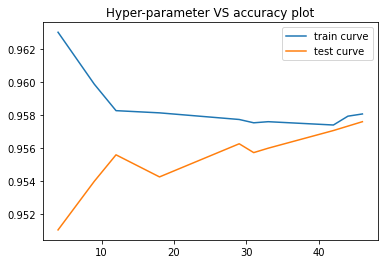

In [ ]:
# plot hyper-parameter vs accuracy plot to choose the best hyper-parameter(k)
plt.plot(params['n_neighbors'],trainscores, label='train curve')
plt.plot(params['n_neighbors'],testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [ ]:
# Funciton to plot decision boundaries.
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

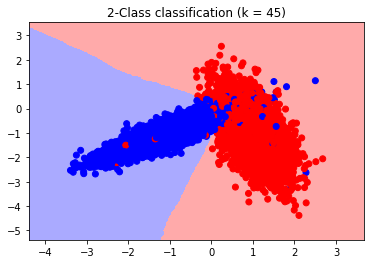

In [ ]:
neigh =  KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:,0],X_train[:,1],y_train,neigh)